<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# Load in the Data

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print('X_train Shape: ', X_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train Shape:  (60000, 28, 28)


In [ ]:
# Build the model
i = Input(shape=X_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7713 - loss: 0.6753 - val_accuracy: 0.9431 - val_loss: 0.1793
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 44ms/step - accuracy: 0.9638 - loss: 0.1209 - val_accuracy: 0.9752 - val_loss: 0.0853
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 43ms/step - accuracy: 0.9778 - loss: 0.0744 - val_accuracy: 0.9802 - val_loss: 0.0654
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 39ms/step - accuracy: 0.9841 - loss: 0.0555 - val_accuracy: 0.9843 - val_loss: 0.0543
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9876 - loss: 0.0419 - val_accuracy: 0.9815 - val_loss: 0.0600
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9881 - loss: 0.0366 - val_accuracy: 0.9857 - val_loss: 0.0465
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9909 - loss: 0.0299 - val_accuracy: 0.9821 - val_loss: 0.0565
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.9907 

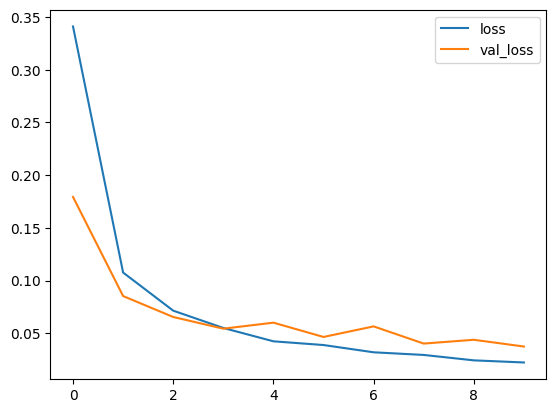

In [ ]:
# Plot loss per Iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

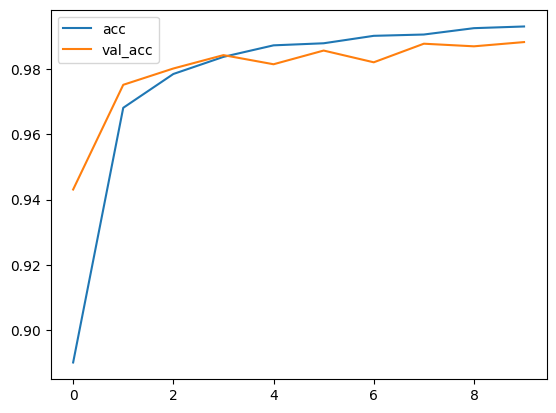

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [ ]:
pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


[[ 973    0    0    0    2    0    2    1    1    1]
 [   0 1131    0    1    0    1    1    0    1    0]
 [   1    1 1025    1    0    0    0    2    2    0]
 [   0    0    5 1002    0    1    0    2    0    0]
 [   0    0    2    0  969    0    1    3    1    6]
 [   0    0    0    5    0  883    3    1    0    0]
 [   0    2    0    0    1    1  954    0    0    0]
 [   0    4    7    0    2    0    0 1012    0    3]
 [   0    3    3    3    0    5    0    3  956    1]
 [   1    0    1    0   14    4    0    5    6  978]]
Axes(0.125,0.11;0.62x0.77)


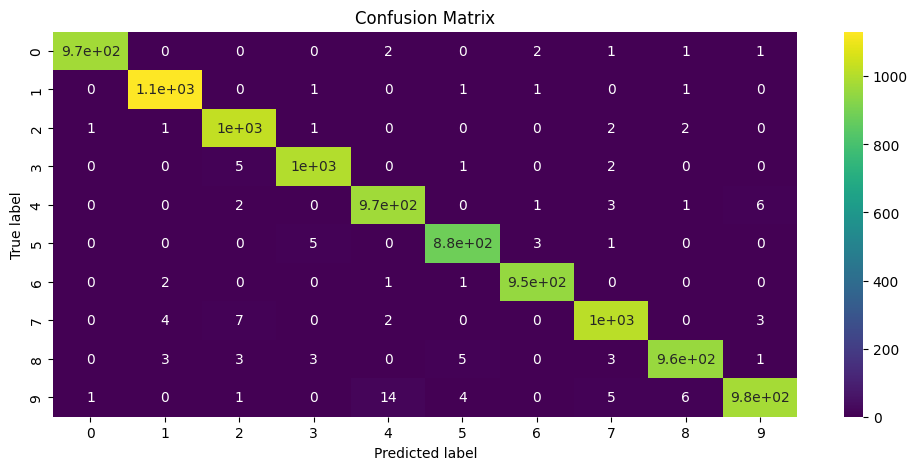

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import numpy as np

plt.figure(figsize=(12,5))
# Convert predictions to discrete class labels using argmax
pred_labels = np.argmax(pred, axis=1)

# Now, use pred_labels in the confusion_matrix function
print(confusion_matrix(y_test, pred_labels))
print(sns.heatmap(confusion_matrix(y_test, pred_labels), annot=True, cmap='viridis'))
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

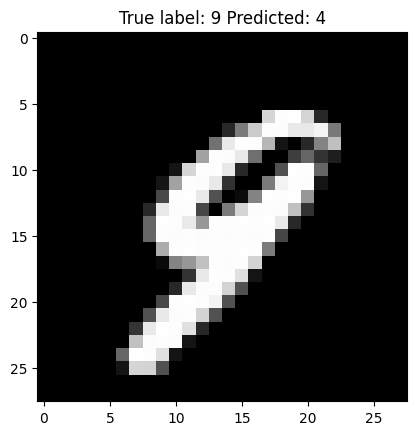

In [ ]:
# Show some misclassified samples
misclassified_idx = np.where(pred_labels != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], pred_labels[i]));